In [ ]:
import pandas as pd

In [ ]:
def remove_test_ontologies(file_path):
    if file_path.startswith('TestOntologies/'):
        return file_path[len('TestOntologies/'):]
    return file_path

df = pd.read_csv("results.csv")
df = df.drop(df.index[-2:])
df['file'] = df['file'].apply(remove_test_ontologies)
df = df.fillna(0)
df.head(3)

,file,class,reasoner,iterations,time,n_subsumers,subsumers
0,bfo.basic-formal-ontology.2.owl.xml,BFO_0000002,3,0.0,0.0000,2,"['BFO_0000002', 'BFO_0000001']"
1,bfo.basic-formal-ontology.2.owl.xml,BFO_0000002,1,2.0,0.0781,2,"['BFO_0000002', 'BFO_0000001']"
2,bfo.basic-formal-ontology.2.owl.xml,BFO_0000002,2,2.0,0.1334,2,"['BFO_0000002', 'BFO_0000001']"


In [ ]:
total = 0

for file in df['file'].unique():
  n = df[df['reasoner'] == 3][df['file'] == file].shape[0]
  print(f"Tested {n} classes from file {file}")
  total += n

print(f"\nIn total: {total} classes from {len(df['file'].unique())} ontologies")
print("\n")

Tested 30 classes from file bfo.basic-formal-ontology.2.owl.xml
Tested 30 classes from file amino-acid.amino-acid-ontology.2.owl.xml
Tested 30 classes from file pizza.owl
Tested 30 classes from file sushi_restaurant.owl
Tested 10 classes from file Skin Physiology Ontology 2.0.owl
Tested 10 classes from file cto.clinical-trials-ontology.1.owl.xml
Tested 10 classes from file ico.informed-consent-ontology.9.owl.xml
Tested 3 classes from file ontodm-core.ontology-of-core-data-mining-entities.6.owl.xml

In total: 153 classes from 8 ontologies




<ipython-input-49-1b5041e357a8>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n = df[df['reasoner'] == 3][df['file'] == file].shape[0]


# **Comparison of reasoner with ELK**

In [ ]:
compare_n_subsumers = pd.DataFrame(columns = ['file', 'class',
                                              '# subsumers ELK',
                                              '# subsumers EL reasoner'])

for index, row in df[df["reasoner"] == 3].iterrows():
  f = row['file']
  cl = row['class']
  n_subsumers_elk = row['n_subsumers']
  n_subsumers_el = df[df['file'] == f][df['class'] == cl][df['reasoner'] == 1]['n_subsumers'].values[0]
  compare_n_subsumers.loc[len(compare_n_subsumers.index)] = [f, cl, n_subsumers_elk, n_subsumers_el]

In [ ]:
equal = compare_n_subsumers[compare_n_subsumers["# subsumers EL reasoner"] == compare_n_subsumers["# subsumers ELK"]]
more = compare_n_subsumers[compare_n_subsumers["# subsumers EL reasoner"] > compare_n_subsumers["# subsumers ELK"]]
less = compare_n_subsumers[compare_n_subsumers["# subsumers EL reasoner"] < compare_n_subsumers["# subsumers ELK"]]

In [ ]:
comparison_result = pd.DataFrame(columns = ['# classes: equal # subsumers found by EL and ELK',
                                            '# classes: EL found more subsumers than ELK',
                                            '# classes: EL found less subsumers than ELK'])
comparison_result.loc[len(comparison_result.index)] = [equal.shape[0], more.shape[0], less.shape[0]]

In [ ]:
comparison_result

,# classes: equal # subsumers found by EL and ELK,# classes: EL found more subsumers than ELK,# classes: EL found less subsumers than ELK
0,119,2,32


In [ ]:
equal.head(3)

,file,class,# subsumers ELK,# subsumers EL reasoner
0,bfo.basic-formal-ontology.2.owl.xml,BFO_0000002,2,2
1,bfo.basic-formal-ontology.2.owl.xml,BFO_0000182,4,4
2,bfo.basic-formal-ontology.2.owl.xml,BFO_0000026,6,6


In [ ]:
more.head()

,file,class,# subsumers ELK,# subsumers EL reasoner
67,pizza.owl,"""VegetarianPizza2""",1,4
81,pizza.owl,"""Napoletana""",7,8


In [ ]:
more_f = more.iloc[0]['file']
more_c = more.iloc[0]['class']

In [ ]:
print('Subsumers found by EL reasoner for "VegetarianPizza2":')
print(df[df['file'] == more_f][df['class'] == more_c][df['reasoner'] == 1]['subsumers'].values[0])
print('Subsumers found by ELK for "VegetarianPizza2":')
print(df[df['file'] == more_f][df['class'] == more_c][df['reasoner'] == 3]['subsumers'].values[0])
print("\n")

Subsumers found by EL reasoner for "VegetarianPizza2":
['"Food"', '"Pizza"', '"VegetarianPizza2"', '"DomainThing"']
Subsumers found by ELK for "VegetarianPizza2":
['"VegetarianPizza2"']




<ipython-input-12-cb72bfeed176>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df['file'] == more_f][df['class'] == more_c][df['reasoner'] == 1]['subsumers'].values[0])
<ipython-input-12-cb72bfeed176>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df['file'] == more_f][df['class'] == more_c][df['reasoner'] == 3]['subsumers'].values[0])


In [ ]:
less.head(3)

,file,class,# subsumers ELK,# subsumers EL reasoner
35,amino-acid.amino-acid-ontology.2.owl.xml,Positive,3,1
36,amino-acid.amino-acid-ontology.2.owl.xml,Neutral,3,1
37,amino-acid.amino-acid-ontology.2.owl.xml,Large,3,1


# **Evaluation and comparison of 2 reasoners**

In [ ]:
compare_time = pd.DataFrame(columns = ['file', 'class',
                                       'time Reasoner1',
                                       'time Reasoner2',
                                       '# iterations Reasoner1',
                                       '# iterations Reasoner2'])

for index, row in df[df["reasoner"] == 1].iterrows():
  f = row['file']
  cl = row['class']
  time_r1 = row['time']
  iterations_r1 = row['iterations']
  time_r2 = df[df['file'] == f][df['class'] == cl][df['reasoner'] == 2]['time'].values[0]
  iterations_r2 = df[df['file'] == f][df['class'] == cl][df['reasoner'] == 2]['iterations'].values[0]
  compare_time.loc[len(compare_time.index)] = [f, cl, time_r1, time_r2, int(iterations_r1), int(iterations_r2)]

### **Compare time for Reasoner 1 and Reasoner 2**

In [ ]:
equal = compare_time[compare_time["time Reasoner1"] == compare_time["time Reasoner2"]]
more = compare_time[compare_time["time Reasoner1"] > compare_time["time Reasoner2"]]
less = compare_time[compare_time["time Reasoner1"] < compare_time["time Reasoner2"]]

In [ ]:
comparison_result = pd.DataFrame(columns = ['# classes: equal time for R1 and R2',
                                            '# classes: more time for R1 than for R2',
                                            '# classes: less time for R1 than for R2'])
comparison_result.loc[len(comparison_result.index)] = [equal.shape[0], more.shape[0], less.shape[0]]

In [ ]:
comparison_result

,# classes: equal time for R1 and R2,# classes: more time for R1 than for R2,# classes: less time for R1 than for R2
0,0,91,62


In [ ]:
more.head(3)

,file,class,time Reasoner1,time Reasoner2,# iterations Reasoner1,# iterations Reasoner2
1,bfo.basic-formal-ontology.2.owl.xml,BFO_0000182,0.2704,0.1524,4,4
2,bfo.basic-formal-ontology.2.owl.xml,BFO_0000026,0.2544,0.2290,6,6
6,bfo.basic-formal-ontology.2.owl.xml,BFO_0000004,0.1241,0.1170,3,3


In [ ]:
less.head(3)

,file,class,time Reasoner1,time Reasoner2,# iterations Reasoner1,# iterations Reasoner2
0,bfo.basic-formal-ontology.2.owl.xml,BFO_0000002,0.0781,0.1334,2,2
3,bfo.basic-formal-ontology.2.owl.xml,BFO_0000008,0.1483,0.1680,3,3
4,bfo.basic-formal-ontology.2.owl.xml,BFO_0000148,0.1682,0.3239,4,4


### **Compare number of iterations for Reasoner 1 and Reasoner 2**

In [ ]:
equal = compare_time[compare_time["# iterations Reasoner1"] == compare_time["# iterations Reasoner2"]]
more = compare_time[compare_time["# iterations Reasoner1"] > compare_time["# iterations Reasoner2"]]
less = compare_time[compare_time["# iterations Reasoner1"] < compare_time["# iterations Reasoner2"]]

In [ ]:
comparison_result = pd.DataFrame(columns = ['# classes: equal # iterations for R1 and R2',
                                            '# classes: more iterations for R1 than for R2',
                                            '# classes: less iterations for R1 than for R2'])
comparison_result.loc[len(comparison_result.index)] = [equal.shape[0], more.shape[0], less.shape[0]]

In [ ]:
comparison_result

,# classes: equal # iterations for R1 and R2,# classes: more iterations for R1 than for R2,# classes: less iterations for R1 than for R2
0,102,26,25


In [ ]:
equal.head(3)

,file,class,time Reasoner1,time Reasoner2,# iterations Reasoner1,# iterations Reasoner2
0,bfo.basic-formal-ontology.2.owl.xml,BFO_0000002,0.0781,0.1334,2,2
1,bfo.basic-formal-ontology.2.owl.xml,BFO_0000182,0.2704,0.1524,4,4
2,bfo.basic-formal-ontology.2.owl.xml,BFO_0000026,0.2544,0.2290,6,6


In [ ]:
more.head(3)

,file,class,time Reasoner1,time Reasoner2,# iterations Reasoner1,# iterations Reasoner2
32,amino-acid.amino-acid-ontology.2.owl.xml,I,4.2866,3.6575,22,20
34,amino-acid.amino-acid-ontology.2.owl.xml,Q,3.7756,3.4881,22,20
40,amino-acid.amino-acid-ontology.2.owl.xml,M,4.3627,4.4983,22,20


In [ ]:
less.head(3)

,file,class,time Reasoner1,time Reasoner2,# iterations Reasoner1,# iterations Reasoner2
30,amino-acid.amino-acid-ontology.2.owl.xml,TinyPolarAminoAcid,1.6226,1.9697,9,10
41,amino-acid.amino-acid-ontology.2.owl.xml,LargeAliphaticAminoAcid,1.8041,1.5778,9,10
49,amino-acid.amino-acid-ontology.2.owl.xml,C,2.3003,2.6357,14,17


## **Plot results**

In [ ]:
time = compare_time[['file', 'class', 'time Reasoner1', 'time Reasoner2']]

In [ ]:
it = compare_time[['file', 'class', '# iterations Reasoner1', '# iterations Reasoner2']]

In [ ]:
import matplotlib.pyplot as plt

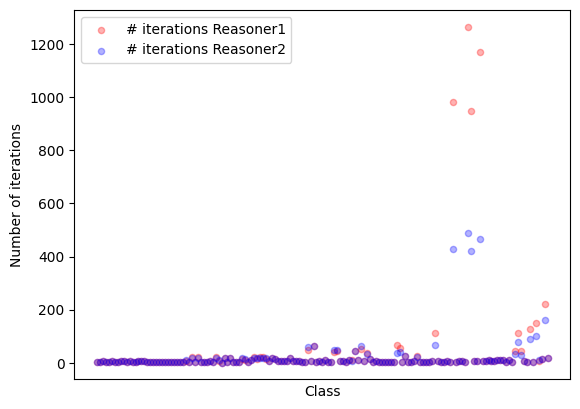

In [ ]:
# Plotting
plt.scatter(it['class'], it['# iterations Reasoner1'],
            color='red', label='# iterations Reasoner1', s=20, alpha=0.3)
plt.scatter(it['class'], it['# iterations Reasoner2'],
            color='blue', label='# iterations Reasoner2', s=20, alpha=0.3)

# Adding labels and legend
plt.xlabel('Class')
plt.ylabel('Number of iterations')
plt.legend()

plt.xticks([])

# Display the plot
plt.show()

In [ ]:
max_it = it.sort_values(['# iterations Reasoner1'], ascending=[False])
max_it.head(4)

,file,class,# iterations Reasoner1,# iterations Reasoner2
125,Skin Physiology Ontology 2.0.owl,MerkelDisc,1265,488
129,Skin Physiology Ontology 2.0.owl,LangerhansCell,1170,465
120,Skin Physiology Ontology 2.0.owl,MerkelCell,983,429
126,Skin Physiology Ontology 2.0.owl,StratumBasale,947,421


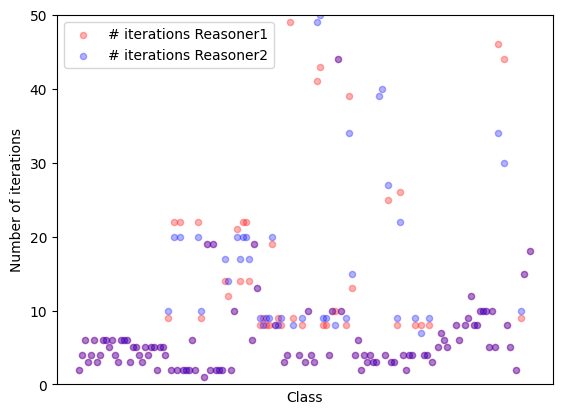

In [ ]:
# Plotting
plt.scatter(it['class'], it['# iterations Reasoner1'],
            color='red', label='# iterations Reasoner1', s=20, alpha=0.3)
plt.scatter(it['class'], it['# iterations Reasoner2'],
            color='blue', label='# iterations Reasoner2', s=20, alpha=0.3)

# Adding labels and legend
plt.xlabel('Class')
plt.ylabel('Number of iterations')
plt.legend()

plt.ylim(0, 50)
plt.xticks([])

# Display the plot
plt.show()

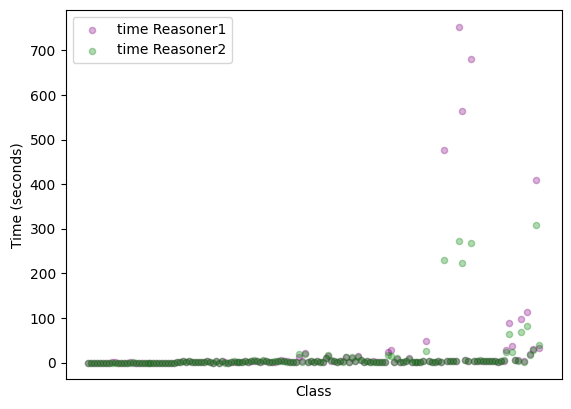

In [ ]:
# Plotting
plt.scatter(time['class'], time['time Reasoner1'],
            color='purple', label='time Reasoner1', s=20, alpha=0.3)
plt.scatter(time['class'], time['time Reasoner2'],
            color='green', label='time Reasoner2', s=20, alpha=0.3)

# Adding labels and legend
plt.xlabel('Class')
plt.ylabel('Time (seconds)')
plt.legend()

plt.xticks([])

# Display the plot
plt.show()

In [ ]:
max_time = time.sort_values(['time Reasoner1'], ascending=[False])
max_time.head(5)

,file,class,time Reasoner1,time Reasoner2
125,Skin Physiology Ontology 2.0.owl,MerkelDisc,752.9775,273.2631
129,Skin Physiology Ontology 2.0.owl,LangerhansCell,681.5489,268.6527
126,Skin Physiology Ontology 2.0.owl,StratumBasale,563.3993,223.2127
120,Skin Physiology Ontology 2.0.owl,MerkelCell,477.0912,229.6288
151,ontodm-core.ontology-of-core-data-mining-entit...,OntoDT_991400,410.1118,309.1429


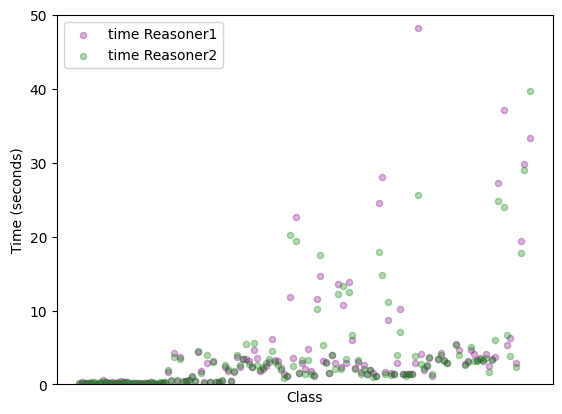

In [ ]:
# Plotting
plt.scatter(time['class'], time['time Reasoner1'],
            color='purple', label='time Reasoner1', s=20, alpha=0.3)
plt.scatter(time['class'], time['time Reasoner2'],
            color='green', label='time Reasoner2', s=20, alpha=0.3)

# Adding labels and legend
plt.xlabel('Class')
plt.ylabel('Time (seconds)')
plt.legend()

plt.ylim(0, 50)
plt.xticks([])

# Display the plot
plt.show()